# Requirements

We dont have selenium, we can pip install selenium, and restart the Kernel(a lot of the time didnt work for me)
or if we are from Anaconda.Navigator, we can go to the enviroments, find which one you use , and from the dropdown list select Not installed , and search selenium check it, apply it , apply again wait to be installed , restart the Kernel
ps:The Kernel is on the top of the jupyter notebook(File, Edit ...)

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [5]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [9]:
# Write your code here.
url = "https://www.scrapethissite.com/pages/forms/"
browser.get(url)

In [11]:
# Add as many code boxes as you need.
teams_data = []
teams = browser.find_elements(By.CLASS_NAME, "team")
for team in teams[:25]:
    name = team.find_element(By.CLASS_NAME, "name").text
    year = team.find_element(By.CLASS_NAME, "year").text
    wins = team.find_element(By.CLASS_NAME, "wins").text
    losses = team.find_element(By.CLASS_NAME, "losses").text
    if year == '1990':
        teams_data.append({"Team": name, "Year": year, "Wins": int(wins), "Losses": int(losses)})
browser.quit()

In [13]:
df = pd.DataFrame(teams_data)
print(df)

                     Team  Year  Wins  Losses
0           Boston Bruins  1990    44      24
1          Buffalo Sabres  1990    31      30
2          Calgary Flames  1990    46      26
3      Chicago Blackhawks  1990    49      23
4       Detroit Red Wings  1990    34      38
5         Edmonton Oilers  1990    37      37
6        Hartford Whalers  1990    31      38
7       Los Angeles Kings  1990    46      24
8   Minnesota North Stars  1990    27      39
9      Montreal Canadiens  1990    39      30
10      New Jersey Devils  1990    32      33
11     New York Islanders  1990    25      45
12       New York Rangers  1990    36      31
13    Philadelphia Flyers  1990    33      37
14    Pittsburgh Penguins  1990    41      33
15       Quebec Nordiques  1990    16      50
16        St. Louis Blues  1990    47      22
17    Toronto Maple Leafs  1990    23      46
18      Vancouver Canucks  1990    28      43
19    Washington Capitals  1990    37      36
20          Winnipeg Jets  1990   

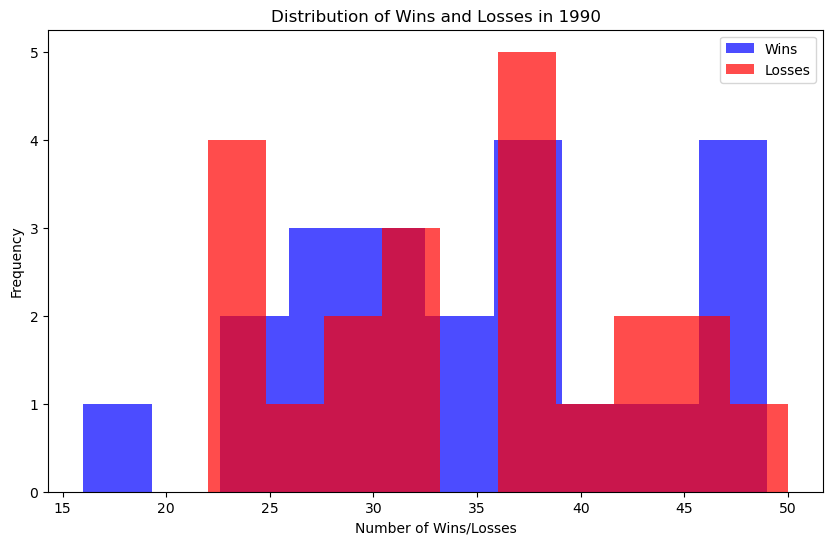

In [17]:
df_1990 = df[df["Year"] == "1990"]

plt.figure(figsize=(10, 6))
plt.hist(df_1990["Wins"], bins=10, alpha=0.7, label='Wins', color='blue')
plt.hist(df_1990["Losses"], bins=10, alpha=0.7, label='Losses', color='red')
plt.title("Distribution of Wins and Losses in 1990")
plt.xlabel("Number of Wins/Losses")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [31]:
# Write your code here.
import time
url="https://www.scrapethissite.com/pages/forms/"
browser.get(url)

search_field = browser.find_element(By.ID, "q")
search_field.send_keys("Boston Bruins")
search_button = browser.find_element(By.XPATH, "//button[@type='submit']")
search_button.click()

bruins_data = []
teams = browser.find_elements(By.CLASS_NAME, "team")
for team in teams:
    name = team.find_element(By.CLASS_NAME, "name").text
    year = int(team.find_element(By.CLASS_NAME, "year").text)
    if name == "Boston Bruins" and 1990 <= year <= 2011:
        wins = int(team.find_element(By.CLASS_NAME, "wins").text)
        losses = int(team.find_element(By.CLASS_NAME, "losses").text)
        bruins_data.append({"Year": year, "Wins": wins, "Losses": losses})
    time.sleep(5)

driver.quit()

MaxRetryError: HTTPConnectionPool(host='localhost', port=51309): Max retries exceeded with url: /session/d66df114fb558fad05ceef36f5691593/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000000010C88B30>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [25]:
# Add as many code boxes as you need.
df_bruins = pd.DataFrame(bruins_data)
print(df_bruins)

NameError: name 'bruins_data' is not defined

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df_bruins["Year"], df_bruins["Wins"], label="Wins", color="blue", marker='o')
plt.plot(df_bruins["Year"], df_bruins["Losses"], label="Losses", color="red", marker='o')
plt.title("Boston Bruins Wins and Losses (1990-2011)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'df_bruins' is not defined

<Figure size 1200x600 with 0 Axes>